In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dailysales.csv')

In [3]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1321 non-null   object 
 1   # of Baskets  1321 non-null   int64  
 2   # of Items    1321 non-null   int64  
 3   Avg Items     1321 non-null   float64
 4   Sales $       1321 non-null   object 
 5   Avg Sale      1321 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.1+ KB
None
       # of Baskets   # of Items    Avg Items
count   1321.000000  1321.000000  1321.000000
mean     132.939440   287.772142     2.162074
std       32.362403    73.338931     0.220725
min        0.000000     0.000000     0.000000
25%      117.000000   249.000000     2.000000
50%      136.000000   295.000000     2.200000
75%      154.000000   333.000000     2.300000
max      247.000000   670.000000     3.900000
         Date  # of Baskets  # of Items  Avg Items  Sales $ Avg Sale

In [4]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove dollar signs and convert 'Sales $' and 'Avg Sale' to numeric
df['Sales $'] = df['Sales $'].replace('[\$,]', '', regex=True).astype(float)
df['Avg Sale'] = df['Avg Sale'].replace('[\$,]', '', regex=True).astype(float)

# Sort the data by Date
df = df.sort_values('Date').reset_index(drop=True)

# Rename columns for easier reference
df.columns = df.columns.str.replace(' ', '_').str.replace('#', 'Num').str.replace('$', 'USD')

# Final cleaned data
print(df.head())

        Date  Num_of_Baskets  Num_of_Items  Avg_Items  Sales_USD  Avg_Sale
0 2021-08-19               9            17        1.9      87.66      9.74
1 2021-08-20              16            32        2.0     172.53     10.78
2 2021-08-21              22            42        1.9     271.85     12.35
3 2021-08-22               6             9        1.5     127.14     21.19
4 2021-08-23               6             8        1.3      43.03      7.17


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_10252/2234513829.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Sales $'] = df['Sales $'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_10252/2234513829.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['Avg Sale'] = df['Avg Sale'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
# Summary statistics
df.describe()

,Date,Num_of_Baskets,Num_of_Items,Avg_Items,Sales_USD,Avg_Sale
count,1321,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,2023-06-10 00:00:00,132.939440,287.772142,2.162074,1665.766124,12.344951
min,2021-08-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-07-15 00:00:00,117.000000,249.000000,2.000000,1340.210000,10.660000
50%,2023-06-10 00:00:00,136.000000,295.000000,2.200000,1635.920000,12.040000
75%,2024-05-05 00:00:00,154.000000,333.000000,2.300000,1990.960000,13.540000
max,2025-03-31 00:00:00,247.000000,670.000000,3.900000,5997.910000,36.370000
std,NaN,32.362403,73.338931,0.220725,588.599982,2.659230


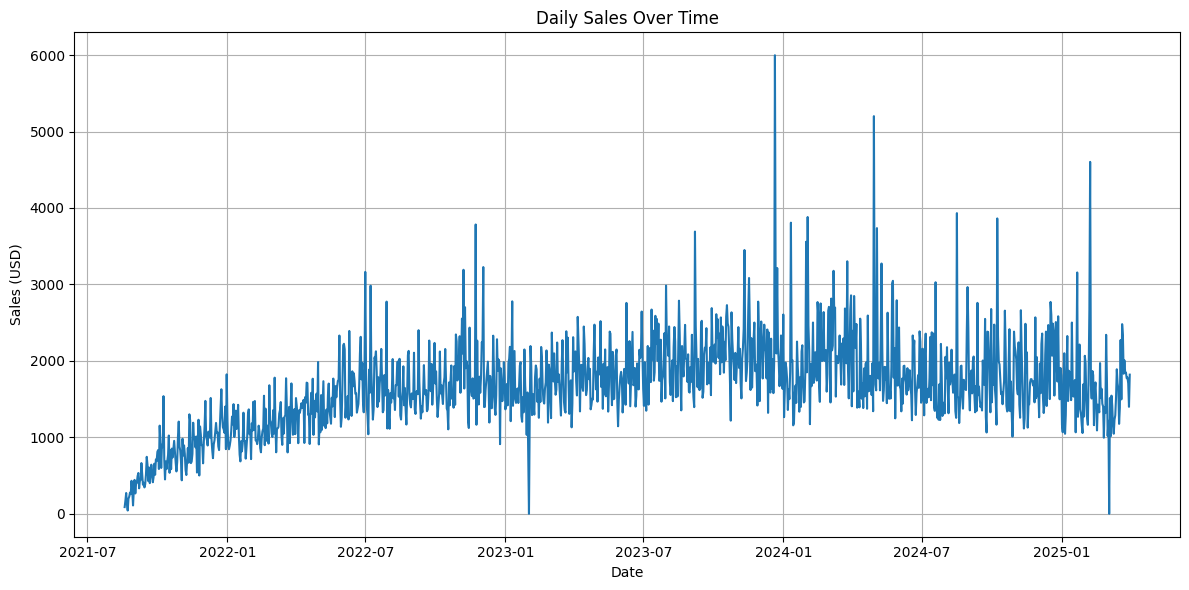

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales_USD'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


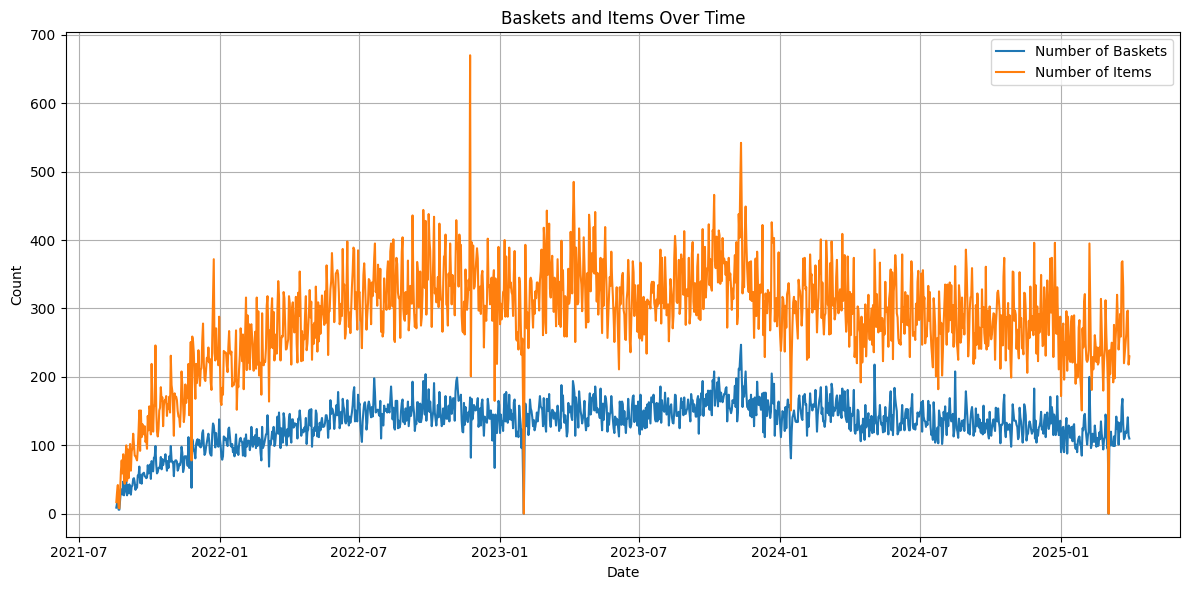

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Num_of_Baskets'], label='Number of Baskets')
plt.plot(df['Date'], df['Num_of_Items'], label='Number of Items')
plt.title('Baskets and Items Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


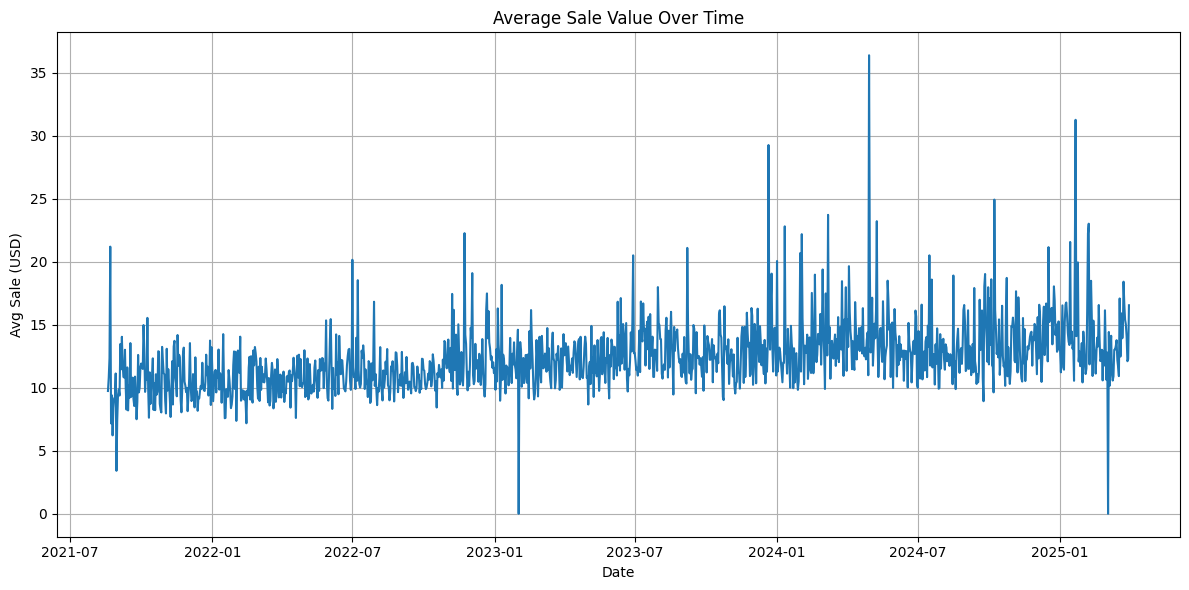

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Avg_Sale'])
plt.title('Average Sale Value Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Sale (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract components for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Weekly Average Sale (grouped by Year, Month, Week)
weekly_avg = df.groupby(['Year', 'Month', 'Week'])['Sales_USD'].mean().reset_index(name='Weekly_Avg_Sales')
df = df.merge(weekly_avg, on=['Year', 'Month', 'Week'], how='left')

# Monthly Average Sale (grouped by Year, Month)
monthly_avg = df.groupby(['Year', 'Month'])['Sales_USD'].mean().reset_index(name='Monthly_Avg_Sales')
df = df.merge(monthly_avg, on=['Year', 'Month'], how='left')

# Yearly Average Sale (grouped by Year)
yearly_avg = df.groupby(['Year'])['Sales_USD'].mean().reset_index(name='Yearly_Avg_Sales')
df = df.merge(yearly_avg, on='Year', how='left')

# Final check
print(df[['Date', 'Sales_USD', 'Weekly_Avg_Sales', 'Monthly_Avg_Sales', 'Yearly_Avg_Sales']].head())


        Date  Sales_USD  Weekly_Avg_Sales  Monthly_Avg_Sales  Yearly_Avg_Sales
0 2021-08-19      87.66        164.795000         215.680769        760.280148
1 2021-08-20     172.53        164.795000         215.680769        760.280148
2 2021-08-21     271.85        164.795000         215.680769        760.280148
3 2021-08-22     127.14        164.795000         215.680769        760.280148
4 2021-08-23      43.03        247.207143         215.680769        760.280148


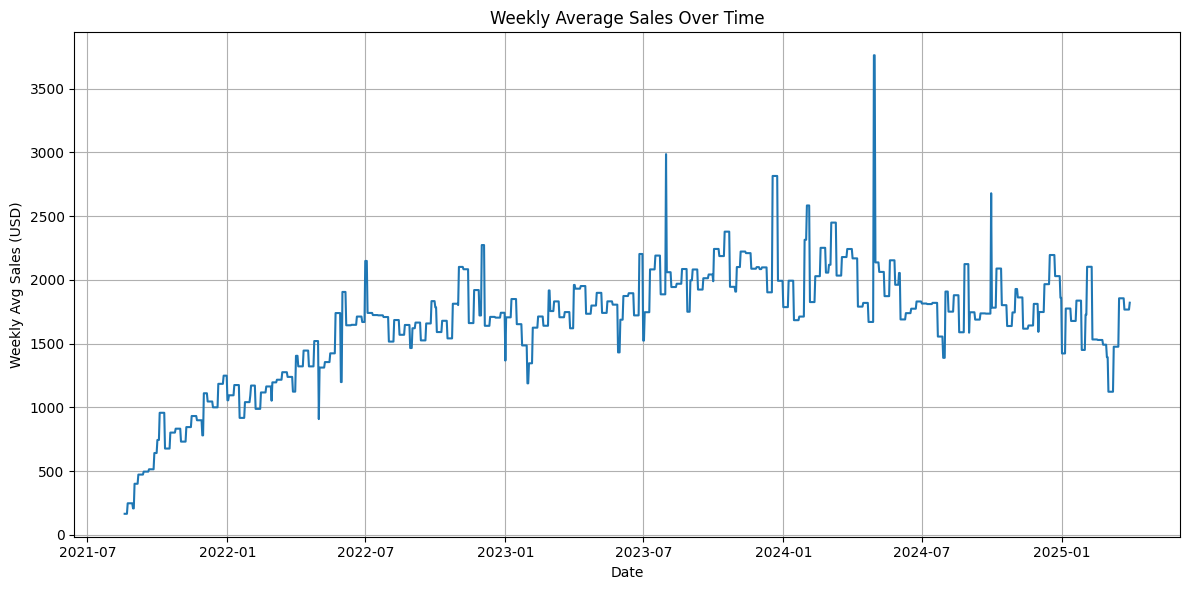

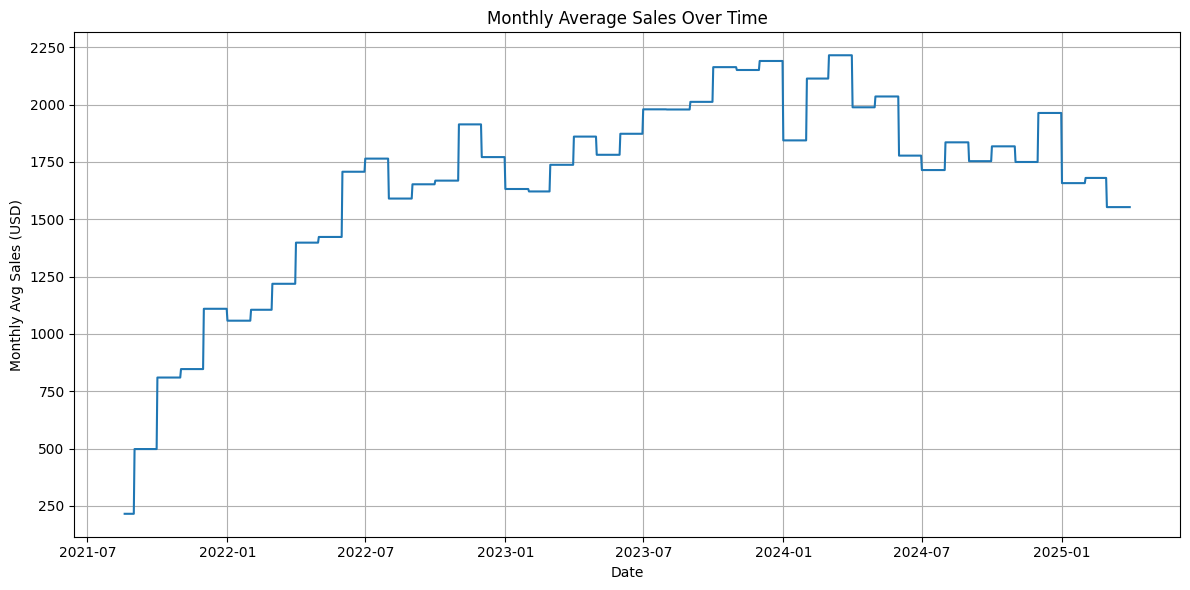

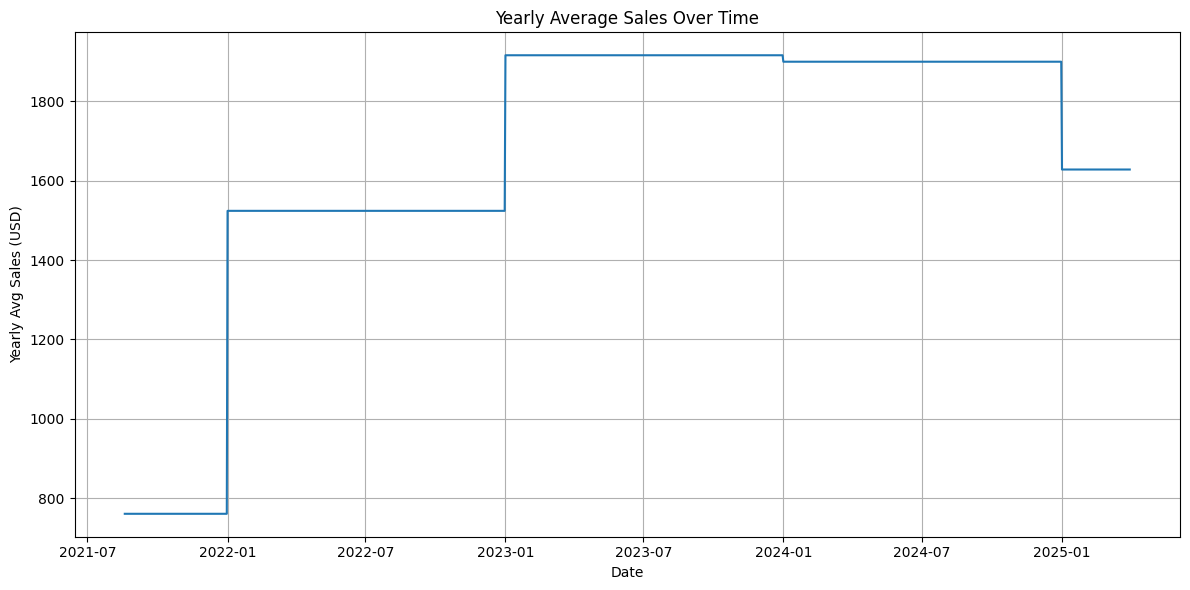

In [10]:
import matplotlib.pyplot as plt

# Weekly Average Sales
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekly_Avg_Sales'])
plt.title('Weekly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Avg Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Average Sales
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Monthly_Avg_Sales'])
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Avg Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly Average Sales
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Yearly_Avg_Sales'])
plt.title('Yearly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Yearly Avg Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Step 1: Extract day of week (Monday=0, Sunday=6)
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Step 2: Tag as 'Weekday' or 'Weekend'
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Step 3: Group and compute averages
daytype_avg = df.groupby(['Year', 'Month', 'Week', 'Day_Type'])['Sales_USD'].mean().reset_index()

# Step 4: Pivot into separate columns for Weekday and Weekend averages
daytype_avg_pivot = daytype_avg.pivot(index=['Year', 'Month', 'Week'], columns='Day_Type', values='Sales_USD').reset_index()
daytype_avg_pivot.columns.name = None  # remove the name of the columns index

# Step 5: Merge with original DataFrame
df = df.merge(daytype_avg_pivot, on=['Year', 'Month', 'Week'], how='left')

# Optional: Rename for clarity
df = df.rename(columns={'Weekday': 'Weekday_Weekly_Avg_Sales', 'Weekend': 'Weekend_Weekly_Avg_Sales'})

# Final check
print(df[['Date', 'Sales_USD', 'Weekday_Weekly_Avg_Sales', 'Weekend_Weekly_Avg_Sales']].head())


        Date  Sales_USD  Weekday_Weekly_Avg_Sales  Weekend_Weekly_Avg_Sales
0 2021-08-19      87.66                   130.095                   199.495
1 2021-08-20     172.53                   130.095                   199.495
2 2021-08-21     271.85                   130.095                   199.495
3 2021-08-22     127.14                   130.095                   199.495
4 2021-08-23      43.03                   199.618                   366.180


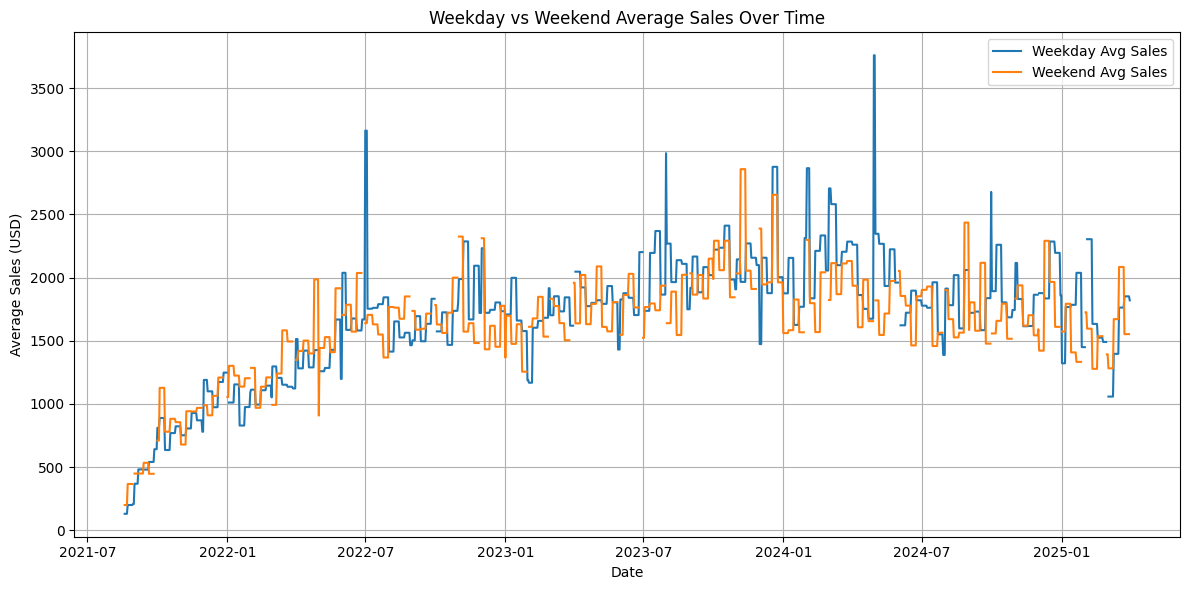

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekday_Weekly_Avg_Sales'], label='Weekday Avg Sales')
plt.plot(df['Date'], df['Weekend_Weekly_Avg_Sales'], label='Weekend Avg Sales')
plt.title('Weekday vs Weekend Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Step 1: Compute weekly average sales (if not already done)
weekly_avg = df.groupby(['Year', 'Month', 'Week'])['Sales_USD'].mean().reset_index(name='Weekly_Avg_Sales')

# Step 2: Compare with previous week (within the same year)
weekly_avg['Weekly_Change_vs_Previous_Week'] = weekly_avg['Weekly_Avg_Sales'].diff()

# Step 3: Compare with same week in previous year
prev_year = weekly_avg.copy()
prev_year['Year'] += 1
prev_year = prev_year.rename(columns={'Weekly_Avg_Sales': 'Prev_Year_Same_Week_Avg'})

weekly_avg = pd.merge(weekly_avg, prev_year[['Year', 'Week', 'Prev_Year_Same_Week_Avg']],
                      on=['Year', 'Week'], how='left')

weekly_avg['Weekly_Change_vs_Same_Week_Last_Year'] = (
    weekly_avg['Weekly_Avg_Sales'] - weekly_avg['Prev_Year_Same_Week_Avg']
)

# Step 4: Merge back into main DataFrame
df = df.merge(weekly_avg[['Year', 'Week', 'Weekly_Change_vs_Previous_Week', 'Weekly_Change_vs_Same_Week_Last_Year']],
              on=['Year', 'Week'], how='left')

# Final check
print(df[['Date', 'Weekly_Change_vs_Previous_Week', 'Weekly_Change_vs_Same_Week_Last_Year']].head())


        Date  Weekly_Change_vs_Previous_Week  \
0 2021-08-19                             NaN   
1 2021-08-20                             NaN   
2 2021-08-21                             NaN   
3 2021-08-22                             NaN   
4 2021-08-23                       82.412143   

   Weekly_Change_vs_Same_Week_Last_Year  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  


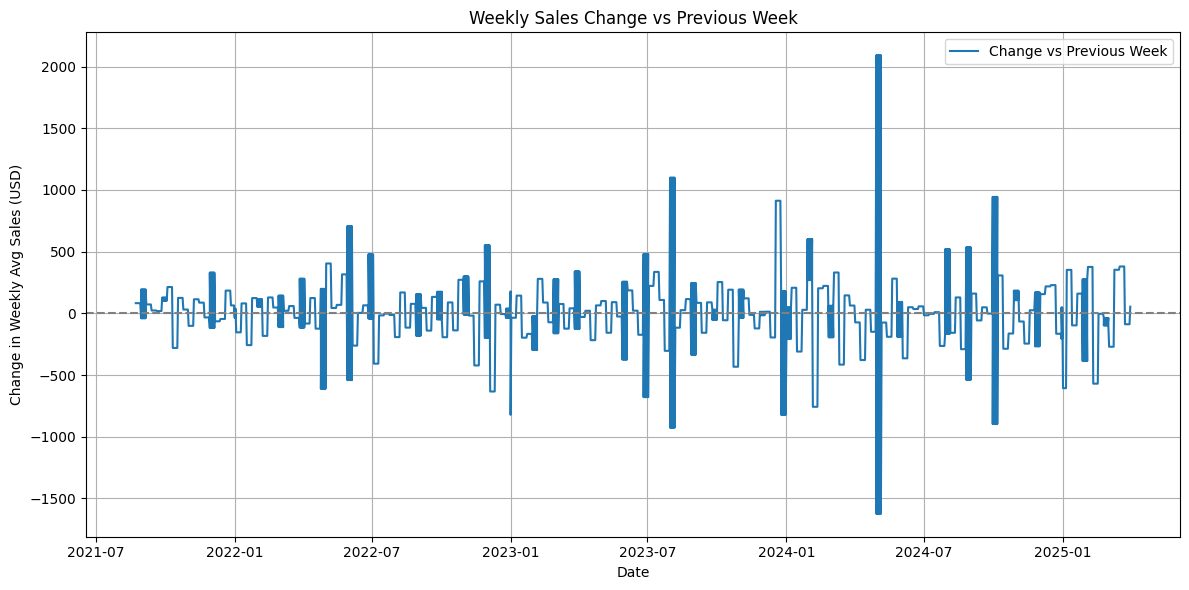

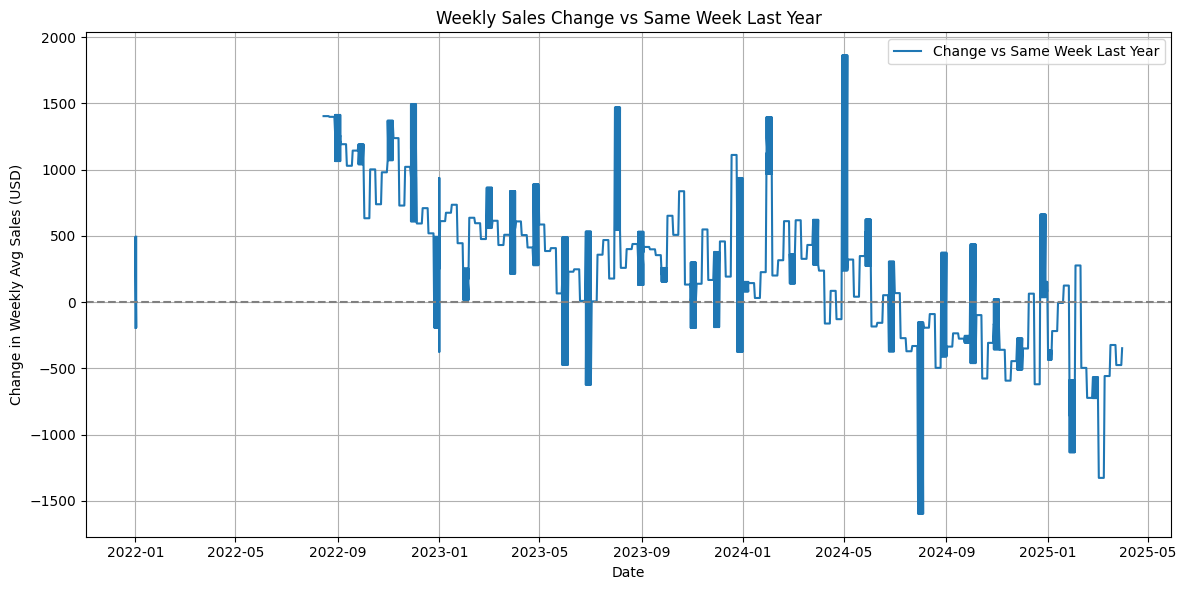

In [14]:
import matplotlib.pyplot as plt

# Weekly change vs previous week
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekly_Change_vs_Previous_Week'], label='Change vs Previous Week')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Weekly Sales Change vs Previous Week')
plt.xlabel('Date')
plt.ylabel('Change in Weekly Avg Sales (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Weekly change vs same week last year
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekly_Change_vs_Same_Week_Last_Year'], label='Change vs Same Week Last Year')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Weekly Sales Change vs Same Week Last Year')
plt.xlabel('Date')
plt.ylabel('Change in Weekly Avg Sales (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


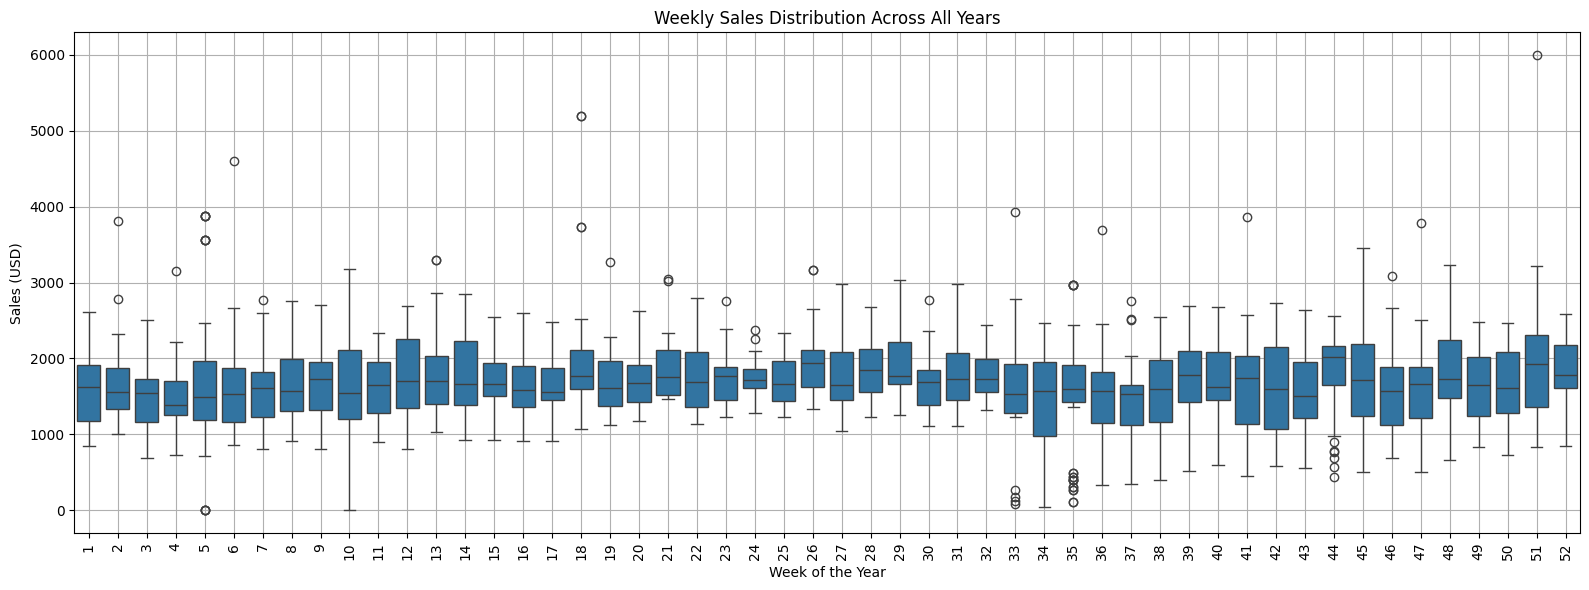

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Week' and 'Sales_USD' are present and clean
df['Week'] = df['Date'].dt.isocalendar().week

# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x='Week', y='Sales_USD', data=df)
plt.title('Weekly Sales Distribution Across All Years')
plt.xlabel('Week of the Year')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Step 1: Calculate average sales for each week of the year across all years
weekly_avg = df.groupby('Week')['Sales_USD'].mean().reset_index(name='Avg_Weekly_Sales')

# Step 2: Calculate quantiles
q1 = weekly_avg['Avg_Weekly_Sales'].quantile(0.25)
q3 = weekly_avg['Avg_Weekly_Sales'].quantile(0.75)

# Step 3: Categorize each week
def categorize_week(sales):
    if sales >= q3:
        return 'High Sales Week'
    elif sales <= q1:
        return 'Low Sales Week'
    else:
        return 'Medium Sales Week'

weekly_avg['Sales_Category'] = weekly_avg['Avg_Weekly_Sales'].apply(categorize_week)

# Step 4: Merge this categorization back into the main DataFrame
df = df.merge(weekly_avg[['Week', 'Sales_Category']], on='Week', how='left')

# Final check
print(df[['Date', 'Week', 'Sales_USD', 'Sales_Category']].head())


        Date  Week  Sales_USD  Sales_Category
0 2021-08-19    33      87.66  Low Sales Week
1 2021-08-20    33     172.53  Low Sales Week
2 2021-08-21    33     271.85  Low Sales Week
3 2021-08-22    33     127.14  Low Sales Week
4 2021-08-23    34      43.03  Low Sales Week


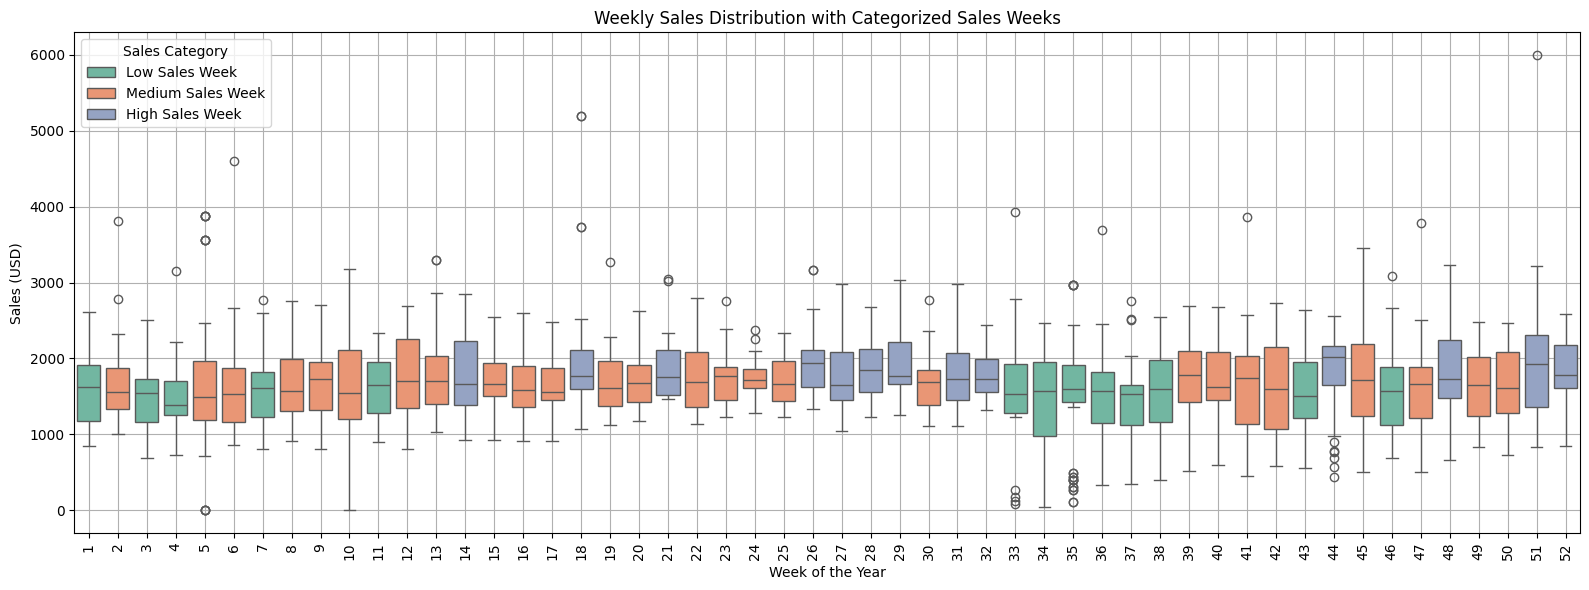

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(x='Week', y='Sales_USD', hue='Sales_Category', data=df, palette='Set2')
plt.title('Weekly Sales Distribution with Categorized Sales Weeks')
plt.xlabel('Week of the Year')
plt.ylabel('Sales (USD)')
plt.legend(title='Sales Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


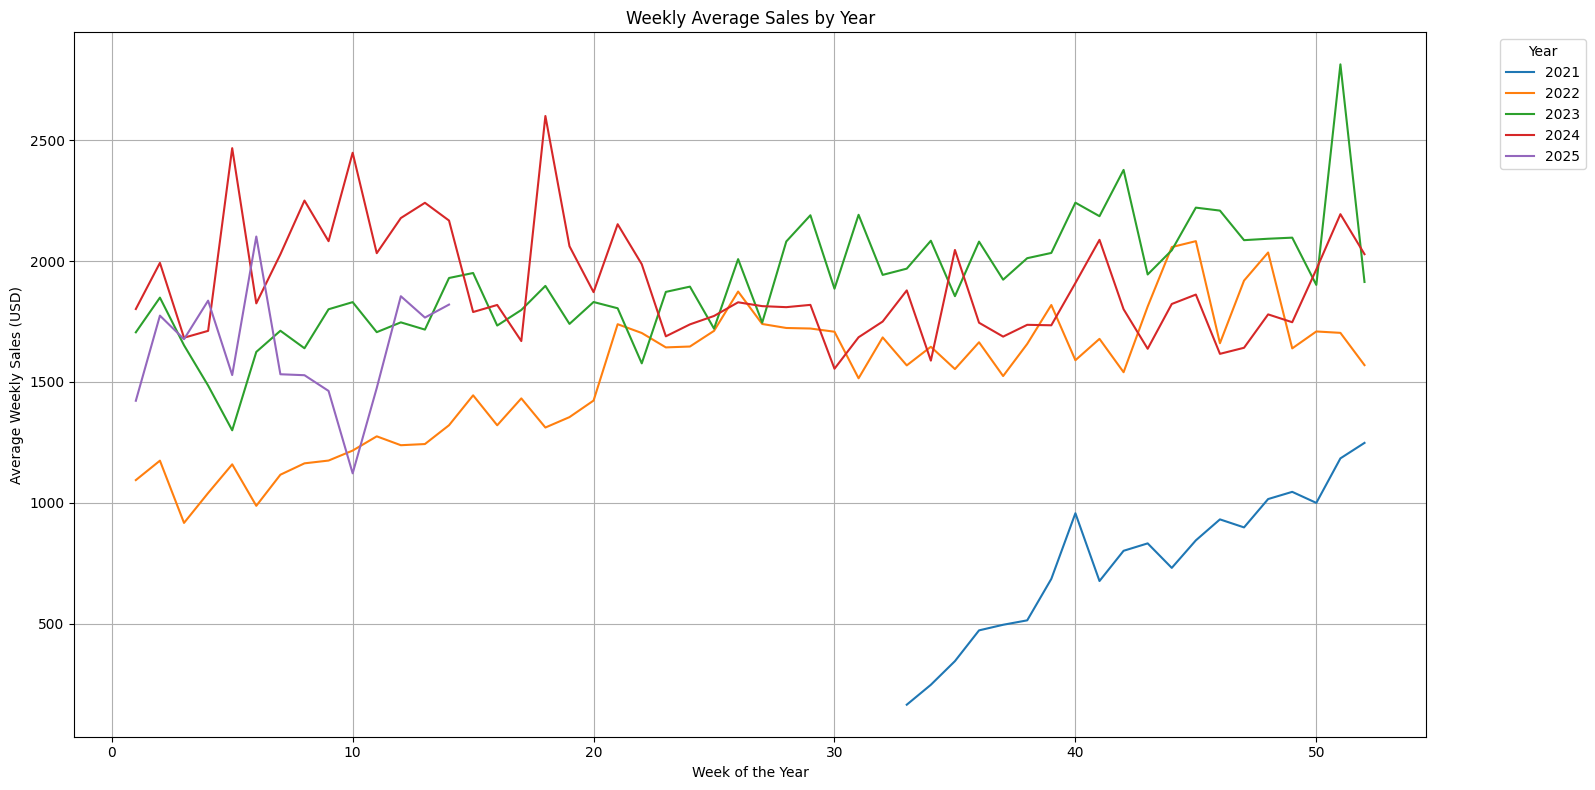

In [22]:
import matplotlib.pyplot as plt

# Ensure all components are available
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Group by Year and Week for average weekly sales
weekly_sales = df.groupby(['Year', 'Week'])['Sales_USD'].mean().reset_index()

# Pivot so each year is a separate column
weekly_sales_pivot = weekly_sales.pivot(index='Week', columns='Year', values='Sales_USD')

# Plot
plt.figure(figsize=(16, 8))
for year in weekly_sales_pivot.columns:
    plt.plot(weekly_sales_pivot.index, weekly_sales_pivot[year], label=str(year))

plt.title('Weekly Average Sales by Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Weekly Sales (USD)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
